In [7]:
data = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data"
res = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/results"

In [8]:
import pandas as pd
import os

## Medication Patient Data

## Filter Meds

### Med 1

In [1]:
# Female, 60-70, WHITE

In [2]:
gender = "F"
age_b = 60
age_a = 70
ethnicity = "WHITE"
stratify_prefix = f"{age_b}-{age_a}_{gender}_{ethnicity}"


In [9]:
med1 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med1_vectorized.csv"))

In [10]:
h_adm_1 = med1.sort_values(["SUBJECT_ID", "STARTTIME"]).groupby("SUBJECT_ID").nth(0)["HADM_ID"].to_list()
med1 = med1[med1.HADM_ID.isin(h_adm_1)]

In [11]:
med1 = med1.drop(columns=["Unnamed: 0"])

In [12]:
med1 = med1[med1["AGE"]>=age_b]
med1 = med1[med1["AGE"]<=age_a]

In [13]:
med1 = med1[med1["GENDER"]==gender]
med1 = med1[med1["ETHNICITY"]==ethnicity]

In [14]:
med1

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE
194,735,2068-03-06,F,2128-07-04 00:00:00,1,225158,140547,298103.0,2128-05-27 16:27:00,2128-05-27 16:28:00,...,NaCl 0.9%,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 00:50:00,60.0
195,735,2068-03-06,F,2128-07-04 00:00:00,1,225974,140547,298103.0,2128-05-27 16:41:00,2128-05-27 16:42:00,...,Metoprolol,Metoprolol,metavision,inputevents_mv,Medications,mg,Solution,NaN,3 days 01:04:00,60.0
196,735,2068-03-06,F,2128-07-04 00:00:00,1,225828,140547,298103.0,2128-05-27 21:27:00,2128-05-27 21:28:00,...,LR,LR,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 05:50:00,60.0
197,735,2068-03-06,F,2128-07-04 00:00:00,1,226452,140547,298103.0,2128-05-29 00:17:00,2128-05-29 00:18:00,...,PO Intake,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,4 days 08:40:00,60.0
198,735,2068-03-06,F,2128-07-04 00:00:00,1,225154,140547,298103.0,2128-05-29 08:45:00,2128-05-29 08:46:00,...,Morphine Sulfate,Morphine Sulfate,metavision,inputevents_mv,Medications,mg,Solution,NaN,4 days 17:08:00,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322871,44082,2056-04-27,F,NaN,0,225154,178322,233193.0,2122-04-08 06:55:00,2122-04-08 06:56:00,...,Morphine Sulfate,Morphine Sulfate,metavision,inputevents_mv,Medications,mg,Solution,NaN,0 days 09:54:00,66.0
322872,44082,2056-04-27,F,NaN,0,225159,178322,233193.0,2122-04-07 22:43:00,2122-04-08 08:43:00,...,NaCl 0.45%,NaCl 0.45%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 11:41:00,66.0
322873,44082,2056-04-27,F,NaN,0,223260,178322,233193.0,2122-04-08 10:00:00,2122-04-08 10:01:00,...,Insulin - Glargine,Insulin - Glargine,metavision,inputevents_mv,Medications,units,Solution,NaN,0 days 12:59:00,66.0
322874,44082,2056-04-27,F,NaN,0,223262,178322,233193.0,2122-04-08 12:00:00,2122-04-08 12:01:00,...,Insulin - Humalog,Insulin - Humalog,metavision,inputevents_mv,Medications,units,Solution,NaN,0 days 14:59:00,66.0


In [15]:
d_m_l_doc = pd.read_csv(os.path.join(data, "mimiciii", "1.4","preprocessed", "mapping_med_itemid_doc.csv")).drop(columns=["Unnamed: 0"])

In [16]:
dict_d_m_l = d_m_l_doc.to_dict("records")
res_dict_mapping_med = {
    v:k["Medication"] for k in dict_d_m_l for v in [int(id) for id in k["ITEMID_with_manual"][1:-1].split(",") if id is not '']
}

<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/109719822.py:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  v:k["Medication"] for k in dict_d_m_l for v in [int(id) for id in k["ITEMID_with_manual"][1:-1].split(",") if id is not '']


In [17]:
med1["MIMICExtractLabel"] = med1.apply(lambda r: res_dict_mapping_med[r["ITEMID"]] if r["ITEMID"] in res_dict_mapping_med else r["LABEL"], axis=1)

In [18]:
med1

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE,MIMICExtractLabel
194,735,2068-03-06,F,2128-07-04 00:00:00,1,225158,140547,298103.0,2128-05-27 16:27:00,2128-05-27 16:28:00,...,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 00:50:00,60.0,NaCl 0.9%
195,735,2068-03-06,F,2128-07-04 00:00:00,1,225974,140547,298103.0,2128-05-27 16:41:00,2128-05-27 16:42:00,...,Metoprolol,metavision,inputevents_mv,Medications,mg,Solution,NaN,3 days 01:04:00,60.0,Metoprolol
196,735,2068-03-06,F,2128-07-04 00:00:00,1,225828,140547,298103.0,2128-05-27 21:27:00,2128-05-27 21:28:00,...,LR,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 05:50:00,60.0,LR
197,735,2068-03-06,F,2128-07-04 00:00:00,1,226452,140547,298103.0,2128-05-29 00:17:00,2128-05-29 00:18:00,...,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,4 days 08:40:00,60.0,PO Intake
198,735,2068-03-06,F,2128-07-04 00:00:00,1,225154,140547,298103.0,2128-05-29 08:45:00,2128-05-29 08:46:00,...,Morphine Sulfate,metavision,inputevents_mv,Medications,mg,Solution,NaN,4 days 17:08:00,60.0,Morphine Sulfate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322871,44082,2056-04-27,F,NaN,0,225154,178322,233193.0,2122-04-08 06:55:00,2122-04-08 06:56:00,...,Morphine Sulfate,metavision,inputevents_mv,Medications,mg,Solution,NaN,0 days 09:54:00,66.0,Morphine Sulfate
322872,44082,2056-04-27,F,NaN,0,225159,178322,233193.0,2122-04-07 22:43:00,2122-04-08 08:43:00,...,NaCl 0.45%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 11:41:00,66.0,NaCl 0.45%
322873,44082,2056-04-27,F,NaN,0,223260,178322,233193.0,2122-04-08 10:00:00,2122-04-08 10:01:00,...,Insulin - Glargine,metavision,inputevents_mv,Medications,units,Solution,NaN,0 days 12:59:00,66.0,Insulin - Glargine
322874,44082,2056-04-27,F,NaN,0,223262,178322,233193.0,2122-04-08 12:00:00,2122-04-08 12:01:00,...,Insulin - Humalog,metavision,inputevents_mv,Medications,units,Solution,NaN,0 days 14:59:00,66.0,Insulin - Humalog


### Med 2

In [19]:
med2 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med2_vectorized.csv"))

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/27638116.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  med2 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med2_vectorized.csv"))


In [20]:
h_adm_2 = med2.sort_values(["SUBJECT_ID", "STARTTIME"]).groupby("SUBJECT_ID").nth(0)["HADM_ID"].to_list()
adm_2 = med2[med2.HADM_ID.isin(h_adm_2)]

In [21]:
med2 = med2.drop(columns=["Unnamed: 0"])

In [22]:
med2 = med2[med2["AGE"]>=age_b]
med2 = med2[med2["AGE"]<=age_a]

In [23]:
med2 = med2[med2["GENDER"]==gender]
med2 = med2[med2["ETHNICITY"]==ethnicity]

In [24]:
med2

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE
145,735,2068-03-06,F,2128-07-04 00:00:00,1,225974,140547,298103.0,2128-05-27 17:48:00,2128-05-27 17:49:00,...,Metoprolol,Metoprolol,metavision,inputevents_mv,Medications,mg,Solution,NaN,3 days 02:11:00,60.0
146,735,2068-03-06,F,2128-07-04 00:00:00,1,225158,140547,298103.0,2128-05-27 20:00:00,2128-05-27 20:01:00,...,NaCl 0.9%,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 04:23:00,60.0
147,735,2068-03-06,F,2128-07-04 00:00:00,1,225828,140547,298103.0,2128-05-27 21:28:00,2128-05-28 11:35:00,...,LR,LR,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 19:57:00,60.0
148,735,2068-03-06,F,2128-07-04 00:00:00,1,226452,140547,298103.0,2128-05-29 08:58:00,2128-05-29 08:59:00,...,PO Intake,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,4 days 17:21:00,60.0
149,735,2068-03-06,F,2128-07-04 00:00:00,1,225154,140547,298103.0,2128-05-29 10:00:00,2128-05-29 10:01:00,...,Morphine Sulfate,Morphine Sulfate,metavision,inputevents_mv,Medications,mg,Solution,NaN,4 days 18:23:00,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237516,44082,2056-04-27,F,NaN,0,223262,178322,233193.0,2122-04-08 18:00:00,2122-04-08 18:01:00,...,Insulin - Humalog,Insulin - Humalog,metavision,inputevents_mv,Medications,units,Solution,NaN,0 days 20:59:00,66.0
237517,44082,2056-04-27,F,NaN,0,221824,178322,233193.0,2122-04-09 04:45:00,2122-04-09 04:46:00,...,Haloperidol (Haldol),Haloperidol (Haldol),metavision,inputevents_mv,Medications,mg,Solution,NaN,1 days 07:44:00,66.0
237518,44082,2056-04-27,F,NaN,0,223260,178322,233193.0,2122-04-09 09:10:00,2122-04-09 09:11:00,...,Insulin - Glargine,Insulin - Glargine,metavision,inputevents_mv,Medications,units,Solution,NaN,1 days 12:09:00,66.0
237519,44082,2056-04-27,F,NaN,0,225975,178322,233193.0,2122-04-09 17:00:00,2122-04-09 17:01:00,...,Heparin Sodium (Prophylaxis),Heparin Sodium (Prophylaxis),metavision,inputevents_mv,Medications,dose,Solution,NaN,1 days 19:59:00,66.0


In [25]:
med2["MIMICExtractLabel"] = med2.apply(lambda r: res_dict_mapping_med[r["ITEMID"]] if r["ITEMID"] in res_dict_mapping_med else r["LABEL"], axis=1)

In [26]:
med2

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE,MIMICExtractLabel
145,735,2068-03-06,F,2128-07-04 00:00:00,1,225974,140547,298103.0,2128-05-27 17:48:00,2128-05-27 17:49:00,...,Metoprolol,metavision,inputevents_mv,Medications,mg,Solution,NaN,3 days 02:11:00,60.0,Metoprolol
146,735,2068-03-06,F,2128-07-04 00:00:00,1,225158,140547,298103.0,2128-05-27 20:00:00,2128-05-27 20:01:00,...,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 04:23:00,60.0,NaCl 0.9%
147,735,2068-03-06,F,2128-07-04 00:00:00,1,225828,140547,298103.0,2128-05-27 21:28:00,2128-05-28 11:35:00,...,LR,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 19:57:00,60.0,LR
148,735,2068-03-06,F,2128-07-04 00:00:00,1,226452,140547,298103.0,2128-05-29 08:58:00,2128-05-29 08:59:00,...,PO Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,4 days 17:21:00,60.0,PO Intake
149,735,2068-03-06,F,2128-07-04 00:00:00,1,225154,140547,298103.0,2128-05-29 10:00:00,2128-05-29 10:01:00,...,Morphine Sulfate,metavision,inputevents_mv,Medications,mg,Solution,NaN,4 days 18:23:00,60.0,Morphine Sulfate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237516,44082,2056-04-27,F,NaN,0,223262,178322,233193.0,2122-04-08 18:00:00,2122-04-08 18:01:00,...,Insulin - Humalog,metavision,inputevents_mv,Medications,units,Solution,NaN,0 days 20:59:00,66.0,Insulin - Humalog
237517,44082,2056-04-27,F,NaN,0,221824,178322,233193.0,2122-04-09 04:45:00,2122-04-09 04:46:00,...,Haloperidol (Haldol),metavision,inputevents_mv,Medications,mg,Solution,NaN,1 days 07:44:00,66.0,Haloperidol
237518,44082,2056-04-27,F,NaN,0,223260,178322,233193.0,2122-04-09 09:10:00,2122-04-09 09:11:00,...,Insulin - Glargine,metavision,inputevents_mv,Medications,units,Solution,NaN,1 days 12:09:00,66.0,Insulin - Glargine
237519,44082,2056-04-27,F,NaN,0,225975,178322,233193.0,2122-04-09 17:00:00,2122-04-09 17:01:00,...,Heparin Sodium (Prophylaxis),metavision,inputevents_mv,Medications,dose,Solution,NaN,1 days 19:59:00,66.0,Heparin Sodium (Prophylaxis)


## Filter Labs

In [27]:
# labs = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "labs_vectorized.csv"))
labs = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "lab_patient_data_mimic_extract_1.csv"))
# labs = labs.rename(columns={"SUBJECT_ID_x":"SUBJECT_ID"})

In [ ]:
(0,5), (1, 6), 

Text(0.5, 1.0, 'Distribution of age')

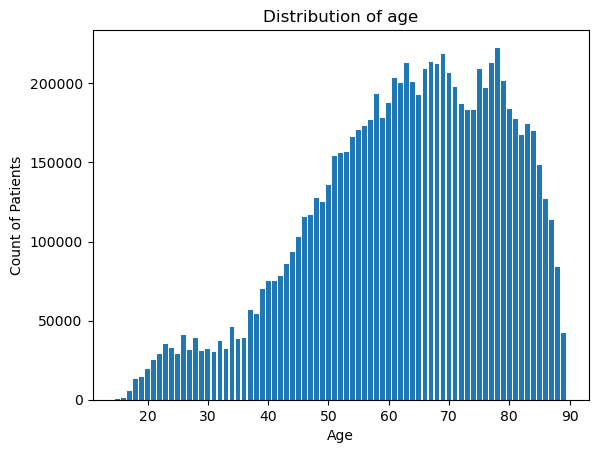

In [28]:
import matplotlib.pyplot as plt
t = labs[labs["AGE"]<100]
t = pd.DataFrame(t["AGE"].value_counts()).reset_index().sort_values(["index"])
plt.bar(t["index"], t["AGE"])
plt.xlabel('Age')
plt.ylabel('Count of Patients')
plt.title('Distribution of age')

In [29]:
labs = labs.drop(columns=["Unnamed: 0"])
labs

,HADM_ID,ADMITTIME,CHARTTIME,VALUENUM,MIMICExtractName,ADMISSION_LOCATION,ADMISSION_TYPE,AGE,DEATHTIME,DIAGNOSIS,...,HAS_CHARTEVENTS_DATA,HOSPITAL_EXPIRE_FLAG,INSURANCE,ITEMID,LANGUAGE,MARITAL_STATUS,RELIGION,SUBJECT_ID,VALUE,VALUEUOM
0,100001.0,2117-09-11 11:46:00,2117-09-11 08:22:00,0.5,Bilirubin,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,50885,ENGL,DIVORCED,PROTESTANT QUAKER,58526,0.5,mg/dL
1,100001.0,2117-09-11 11:46:00,2117-09-11 08:22:00,2.7,Creatinine,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,50912,ENGL,DIVORCED,PROTESTANT QUAKER,58526,2.7,mg/dL
2,100001.0,2117-09-11 11:46:00,2117-09-11 08:22:00,4.9,Potassium,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,50971,ENGL,DIVORCED,PROTESTANT QUAKER,58526,4.9,mEq/L
3,100001.0,2117-09-11 11:46:00,2117-09-11 08:22:00,10.0,Alanine aminotransferase,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,50861,ENGL,DIVORCED,PROTESTANT QUAKER,58526,10.0,IU/L
4,100001.0,2117-09-11 11:46:00,2117-09-11 08:22:00,13.0,Hemoglobin,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,51222,ENGL,DIVORCED,PROTESTANT QUAKER,58526,13.0,g/dL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8874115,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,12.6,Hemoglobin,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220228,ENGL,MARRIED,JEWISH,40370,12.6,g/dl
8874116,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,114.0,Glucose,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220621,ENGL,MARRIED,JEWISH,40370,114.0,mg/dL
8874117,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,138.0,Sodium,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220645,ENGL,MARRIED,JEWISH,40370,138.0,mEq/L
8874118,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,539.0,Platelets,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,227457,ENGL,MARRIED,JEWISH,40370,539.0,K/uL


In [30]:
labs = labs[labs.HADM_ID.isin(h_adm_1+h_adm_2)]

In [31]:
labs = labs[labs["AGE"]>=age_b]
labs = labs[labs["AGE"]<=age_a]

In [32]:
labs = labs[labs["GENDER"]==gender]
labs = labs[labs["ETHNICITY"]==ethnicity]

In [33]:
labs.shape

(233301, 31)

Text(0.5, 1.0, 'Distribution of age')

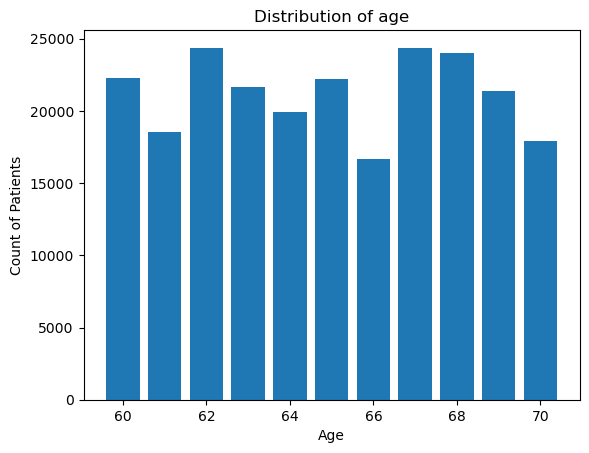

In [34]:
import matplotlib.pyplot as plt
t = labs[labs["AGE"]<100]
t = pd.DataFrame(t["AGE"].value_counts()).reset_index().sort_values(["index"])
plt.bar(t["index"], t["AGE"])
plt.xlabel('Age')
plt.ylabel('Count of Patients')
plt.title('Distribution of age')

In [35]:
import pickle
final_mapping_lab_itemids = pickle.load(open("/Users/yanpavan/Desktop/d.pkl", "rb"))

In [36]:
final_itemids_list = list(final_mapping_lab_itemids.keys())

## Pairs

In [37]:
counts = med1.groupby(["MIMICExtractLabel"]).count()[["HADM_ID"]].sort_values("HADM_ID", ascending=False)
counts

,HADM_ID
MIMICExtractLabel,
NaCl 0.9%,1029
PO Intake,913
Dextrose 5%,883
Solution,690
Magnesium Sulfate,625
...,...
Resource Fruit Beverage,1
Replete with Fiber (1/2),1
Drotrecogin (Xigris),1


In [38]:
labitems = pd.read_csv(os.path.join(data, "mimiciii/1.4/raw", "D_LABITEMS.csv.gz"))
meditems = pd.read_csv(os.path.join(data, "mimiciii/1.4/raw", "D_ITEMS.csv.gz"))

In [39]:
labs

,HADM_ID,ADMITTIME,CHARTTIME,VALUENUM,MIMICExtractName,ADMISSION_LOCATION,ADMISSION_TYPE,AGE,DEATHTIME,DIAGNOSIS,...,HAS_CHARTEVENTS_DATA,HOSPITAL_EXPIRE_FLAG,INSURANCE,ITEMID,LANGUAGE,MARITAL_STATUS,RELIGION,SUBJECT_ID,VALUE,VALUEUOM
13591,100117.0,2166-04-30 19:05:00,2166-04-30 16:10:00,0.5,Bilirubin,EMERGENCY ROOM ADMIT,EMERGENCY,66.0,NaN,PNEUMONIA;TELEMETRY,...,1,0,Medicare,50885,ENGL,DIVORCED,CATHOLIC,14297,0.5,mg/dL
13592,100117.0,2166-04-30 19:05:00,2166-04-30 16:10:00,1.3,Creatinine,EMERGENCY ROOM ADMIT,EMERGENCY,66.0,NaN,PNEUMONIA;TELEMETRY,...,1,0,Medicare,50912,ENGL,DIVORCED,CATHOLIC,14297,1.3,mg/dL
13593,100117.0,2166-04-30 19:05:00,2166-04-30 16:10:00,1.4,Prothrombin time INR,EMERGENCY ROOM ADMIT,EMERGENCY,66.0,NaN,PNEUMONIA;TELEMETRY,...,1,0,Medicare,51237,ENGL,DIVORCED,CATHOLIC,14297,1.4,NaN
13594,100117.0,2166-04-30 19:05:00,2166-04-30 16:10:00,2.1,Magnesium,EMERGENCY ROOM ADMIT,EMERGENCY,66.0,NaN,PNEUMONIA;TELEMETRY,...,1,0,Medicare,50960,ENGL,DIVORCED,CATHOLIC,14297,2.1,mg/dL
13595,100117.0,2166-04-30 19:05:00,2166-04-30 16:10:00,2.4,Potassium,EMERGENCY ROOM ADMIT,EMERGENCY,66.0,NaN,PNEUMONIA;TELEMETRY,...,1,0,Medicare,50971,ENGL,DIVORCED,CATHOLIC,14297,2.4,mEq/L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8867938,199933.0,2166-12-10 13:33:00,2166-12-14 06:35:00,104.0,Glucose,CLINIC REFERRAL/PREMATURE,EMERGENCY,63.0,NaN,STROKE,...,1,0,Private,50931,ENGL,MARRIED,NOT SPECIFIED,55090,104.0,mg/dL
8867939,199933.0,2166-12-10 13:33:00,2166-12-14 06:35:00,136.0,Sodium,CLINIC REFERRAL/PREMATURE,EMERGENCY,63.0,NaN,STROKE,...,1,0,Private,50983,ENGL,MARRIED,NOT SPECIFIED,55090,136.0,mEq/L
8867940,199933.0,2166-12-10 13:33:00,2166-12-14 06:35:00,230.0,Platelets,CLINIC REFERRAL/PREMATURE,EMERGENCY,63.0,NaN,STROKE,...,1,0,Private,51265,ENGL,MARRIED,NOT SPECIFIED,55090,230.0,K/uL
8867941,199933.0,2166-12-10 13:33:00,2166-12-15 06:30:00,10.2,Hemoglobin,CLINIC REFERRAL/PREMATURE,EMERGENCY,63.0,NaN,STROKE,...,1,0,Private,51222,ENGL,MARRIED,NOT SPECIFIED,55090,10.2,g/dL


In [40]:
med1["STARTTIME"] = pd.to_datetime(med1["STARTTIME"])
med1["ENDTIME"] = pd.to_datetime(med1["ENDTIME"])
med1["ADMITTIME"] = pd.to_datetime(med1["ADMITTIME"])
med1["MedTimeFromAdmit"] = med1["ENDTIME"]-med1["ADMITTIME"]
med2["STARTTIME"] = pd.to_datetime(med2["STARTTIME"])
med2["ENDTIME"] = pd.to_datetime(med2["ENDTIME"])
med2["ADMITTIME"] = pd.to_datetime(med2["ADMITTIME"])
med2["MedTimeFromAdmit"] = med2["ENDTIME"]-med2["ADMITTIME"]
labs["CHARTTIME"] = pd.to_datetime(labs["CHARTTIME"])
labs["ADMITTIME"] = pd.to_datetime(labs["ADMITTIME"])
labs["LabTimeFromAdmit"] = labs["CHARTTIME"]-labs["ADMITTIME"]

In [41]:
med1["hours_in"] = med1["MedTimeFromAdmit"].dt.total_seconds()/3600
labs["hours_in"] = labs["LabTimeFromAdmit"].dt.total_seconds()/3600

In [42]:
labs["MIMICExtractName"] = labs["MIMICExtractName"].apply(lambda r: r.strip())
labs

,HADM_ID,ADMITTIME,CHARTTIME,VALUENUM,MIMICExtractName,ADMISSION_LOCATION,ADMISSION_TYPE,AGE,DEATHTIME,DIAGNOSIS,...,INSURANCE,ITEMID,LANGUAGE,MARITAL_STATUS,RELIGION,SUBJECT_ID,VALUE,VALUEUOM,LabTimeFromAdmit,hours_in
13591,100117.0,2166-04-30 19:05:00,2166-04-30 16:10:00,0.5,Bilirubin,EMERGENCY ROOM ADMIT,EMERGENCY,66.0,NaN,PNEUMONIA;TELEMETRY,...,Medicare,50885,ENGL,DIVORCED,CATHOLIC,14297,0.5,mg/dL,-1 days +21:05:00,-2.916667
13592,100117.0,2166-04-30 19:05:00,2166-04-30 16:10:00,1.3,Creatinine,EMERGENCY ROOM ADMIT,EMERGENCY,66.0,NaN,PNEUMONIA;TELEMETRY,...,Medicare,50912,ENGL,DIVORCED,CATHOLIC,14297,1.3,mg/dL,-1 days +21:05:00,-2.916667
13593,100117.0,2166-04-30 19:05:00,2166-04-30 16:10:00,1.4,Prothrombin time INR,EMERGENCY ROOM ADMIT,EMERGENCY,66.0,NaN,PNEUMONIA;TELEMETRY,...,Medicare,51237,ENGL,DIVORCED,CATHOLIC,14297,1.4,NaN,-1 days +21:05:00,-2.916667
13594,100117.0,2166-04-30 19:05:00,2166-04-30 16:10:00,2.1,Magnesium,EMERGENCY ROOM ADMIT,EMERGENCY,66.0,NaN,PNEUMONIA;TELEMETRY,...,Medicare,50960,ENGL,DIVORCED,CATHOLIC,14297,2.1,mg/dL,-1 days +21:05:00,-2.916667
13595,100117.0,2166-04-30 19:05:00,2166-04-30 16:10:00,2.4,Potassium,EMERGENCY ROOM ADMIT,EMERGENCY,66.0,NaN,PNEUMONIA;TELEMETRY,...,Medicare,50971,ENGL,DIVORCED,CATHOLIC,14297,2.4,mEq/L,-1 days +21:05:00,-2.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8867938,199933.0,2166-12-10 13:33:00,2166-12-14 06:35:00,104.0,Glucose,CLINIC REFERRAL/PREMATURE,EMERGENCY,63.0,NaN,STROKE,...,Private,50931,ENGL,MARRIED,NOT SPECIFIED,55090,104.0,mg/dL,3 days 17:02:00,89.033333
8867939,199933.0,2166-12-10 13:33:00,2166-12-14 06:35:00,136.0,Sodium,CLINIC REFERRAL/PREMATURE,EMERGENCY,63.0,NaN,STROKE,...,Private,50983,ENGL,MARRIED,NOT SPECIFIED,55090,136.0,mEq/L,3 days 17:02:00,89.033333
8867940,199933.0,2166-12-10 13:33:00,2166-12-14 06:35:00,230.0,Platelets,CLINIC REFERRAL/PREMATURE,EMERGENCY,63.0,NaN,STROKE,...,Private,51265,ENGL,MARRIED,NOT SPECIFIED,55090,230.0,K/uL,3 days 17:02:00,89.033333
8867941,199933.0,2166-12-10 13:33:00,2166-12-15 06:30:00,10.2,Hemoglobin,CLINIC REFERRAL/PREMATURE,EMERGENCY,63.0,NaN,STROKE,...,Private,51222,ENGL,MARRIED,NOT SPECIFIED,55090,10.2,g/dL,4 days 16:57:00,112.950000


In [43]:
lab_unique_names = labs[labs.HADM_ID.isin(med1.HADM_ID.unique())]["MIMICExtractName"].unique()
lab_unique_names

array(['Bilirubin', 'Creatinine', 'Prothrombin time INR', 'Magnesium',
       'Potassium', 'Hemoglobin', 'Calcium', 'Alanine aminotransferase',
       'Lipase', 'Asparate aminotransferase', 'PTT', 'Sodium', 'Glucose',
       'Platelets', 'Potassium serum', 'Lactic acid', 'Vitamin B12',
       'Amylase', 'Calcium ionized', 'Sodium, Urine', 'Potassium, Urine',
       'Creatinine urine', 'Hemoglobin percent', 'Glucose urine',
       'Uric Acid', 'Glucose, CSF', 'Magnesium, Urine', 'Calcium urine',
       'Glucose, Pleural', 'Creatinine ascites', 'Prolactin',
       'Glucose, Ascites', 'Potassium, Ascites', 'Sodium, Ascites',
       'Amylase, Urine', 'Bilirubin, Total, Ascites', 'Amylase, Ascites',
       'Uric Acid, Urine', 'Amylase, Pleural', 'Creatinine pleural',
       'Creatinine body fluid', 'Glucose, Urine', 'Amylase, Body Fluid',
       'Glucose, Body Fluid', 'Bilirubin, Total, Pleural',
       'Potassium, Body Fluid', 'Glucose, Joint Fluid'], dtype=object)

In [44]:
# mimic_extract_map = pd.read_csv(os.path.join("/Users/yanpavan/Desktop/", "itemid_to_variable_map.csv"))
# mimic_extract_map_small = mimic_extract_map[["LEVEL2", "MIMIC LABEL", "ITEMID"]]
# lab_names = [k.lower() for k in d_m_l_doc.groupby("lab result").count()[["Medication"]].reset_index()["lab result"].to_list()]
# res_dict = {}
# for l in lab_names:
#     res_dict[l.lower().strip()] = mimic_extract_map_small[mimic_extract_map_small.apply(lambda r: l.lower() in str(r["MIMIC LABEL"]).lower(), axis=1)].dropna()
# lab_itemids, lab_labels = {}, {}
# for l in res_dict:
#     if res_dict[l].shape[0]>0:
#         lab_labels[l] = res_dict[l].groupby("LEVEL2")["MIMIC LABEL"].apply(list).to_dict()
#         lab_itemids[l] = res_dict[l].groupby("LEVEL2")["ITEMID"].apply(list).to_dict()   
# del lab_itemids['ast']['Diastolic blood pressure']     
# import pickle
# v_r_lab_dict = pickle.load(open(os.path.join(data, "mapping_lab_itemids.pkl"), "rb"))
# temp_itemids_list = {k: [i for l in list(v.values()) for i in l] for k, v in lab_itemids.items()}
# for l in v_r_lab_dict:
#     if l.lower().strip() in temp_itemids_list:
#         items = [k[1] for k in v_r_lab_dict[l]]
#         names = [k[0] for k in v_r_lab_dict[l]]
#         diff = list(set(items).difference(set(temp_itemids_list[l.lower().strip()])))
#         if len(diff)>0:
#             for k in diff:
#                lab_itemids[l.lower().strip()][names[items.index(k)]] = [k]
#     else:
#         for l1 in v_r_lab_dict[l]:
#             if l1[0] not in lab_itemids:
#                 lab_itemids[l1[0]] = {}
#                 lab_itemids[l1[0]][l1[0]] = [l1[1]]


In [45]:
d_m_l_doc["lab result"].value_counts()

potassium      4
B12            4
sodium         3
glucose        2
ALT            2
platelets      2
prolactin      2
INR            2
Lipase         1
Amylase        1
bilirubin      1
CPK            1
creatinine     1
Aptt           1
magnesium      1
Hemoglobin     1
AST            1
lactic acid    1
Uric acid      1
calcium        1
ANA            1
Name: lab result, dtype: int64

In [46]:
t_lab_itemids = {'ALT': {'Alanine aminotransferase': [50861, 769, 220644]},
 'ANA': {'Fraction inspired oxygen': [189]},
 'AST': {'Asparate aminotransferase': [50878, 770, 220587]},
 'Hemoglobin': {'Hemoglobin percent': [50852],
  'Hemoglobin C': [51224],
  'Hemoglobin F': [51225],
  'Hemoglobin A2': [51223],
  'Hemoglobin': [814, 220228, 51222, 50811]},
 'INR': {'Prothrombin time INR': [51237, 815, 1530, 227467]},
 'bilirubin': {'Bilirubin': [51465,
   50883,
   803,
   225651,
   50885,
   1538,
   848,
   225690,
   50884],
  'Bilirubin, Total, Pleural': [51049],
  'Bilirubin, Total, Body Fluid': [51028],
  'Bilirubin, Total, Ascites': [50838]},
 'calcium': {'Calcium': [786, 1522, 3746, 51029, 50893, 225625],
  'Calcium ionized': [50808, 816, 225667, 3766],
  'Calcium urine': [51066, 51077]},
 'creatinine': {'Creatinine': [791, 1525, 220615, 50912],
  'Creatinine ascites': [50841],
  'Creatinine body fluid': [51032],
  'Creatinine pleural': [51052],
  'Creatinine urine': [51082]},
 'glucose': {'Glucose': [50931,
   807,
   811,
   1529,
   50809,
   3745,
   225664,
   220621,
   226537],
  'Glucose urine': [51478],
  'Glucose, CSF': [51014],
  'Estimated Actual Glucose': [51529],
  'Glucose, Urine': [51084],
  'Glucose, Pleural': [51053],
  'Glucose, Joint Fluid': [51022],
  'Glucose, Ascites': [50842],
  'Glucose, Body Fluid': [51034]},
 'lactic acid': {'Lactic acid': [818, 225668, 1531]},
 'magnesium': {'Magnesium': [50960], 'Magnesium, Urine': [51088]},
 'platelets': {'Platelets': [51265, 828, 227457], 'Large Platelets': [51240]},
 'potassium': {'Potassium': [829, 1535, 227464, 50971, 50822],
  'Potassium serum': [227442],
  'Potassium, Body Fluid': [51041],
  'Potassium, Pleural': [51057],
  'Potassium, Stool': [51064],
  'Potassium, Urine': [51097],
  'Potassium, Ascites': [50847]},
 'sodium': {'Sodium': [837, 1536, 220645, 226534, 50983, 50824],
  'Sodium, Ascites': [50848],
  'Sodium, Body Fluid': [51042],
  'Sodium, Pleural': [51058],
  'Sodium, Stool': [51065],
  'Sodium, Urine': [51100]},
 'Uric acid': {'Uric Acid': [51007], 'Uric Acid, Urine': [51105]},
 'B12': {'Vitamin B12': [51010]},
 'prolactin': {'Prolactin': [50973]},
 'Amylase': {'Amylase': [50867], 'Amylase, Ascites': [50836], 'Amylase, Body Fluid': [51026],'Amylase, Joint Fluid': [51020],'Amylase, Pleural': [51047], 'Amylase, Urine': [51072]},
 'Lipase': {'Lipase': [50956], 'Lipase, Ascites': [50844], 'Lipase, Body Fluid': [51036]},
 'Aptt': {'PTT': [825, 1533, 227466, 51275]}}

In [47]:
# lab_itemids

In [48]:
# orig = ['alt',
#  'ana',
#  'ast',
#  'hemoglobin',
#  'inr',
#  'bilirubin',
#  'calcium',
#  'creatinine',
#  'glucose',
#  'lactic acid',
#  'magnesium',
#  'platelets',
#  'potassium',
#  'sodium']
# dict_lab_mapping = {
#     k:[k] for k in orig
# }


# rest = ['Uric Acid',
#  'Uric Acid, Urine',
#  'Vitamin B12',
#  'Prolactin',
#  'Amylase',
#  'Amylase, Ascites',
#  'Amylase, Body Fluid',
#  'Amylase, Joint Fluid',
#  'Amylase, Pleural',
#  'Amylase, Urine',
#  'Lipase',
#  'Lipase, Ascites',
#  'Lipase, Body Fluid']
# dict_lab_mapping["Uric acid".lower()] = ['Uric Acid', 'Uric Acid, Urine']
# dict_lab_mapping["B12".lower()] = ['Vitamin B12']
# dict_lab_mapping["prolactin".lower()] = ['Prolactin']
# dict_lab_mapping["Amylase".lower()] = [
#  'Amylase',
#  'Amylase, Ascites',
#  'Amylase, Body Fluid',
#  'Amylase, Joint Fluid',
#  'Amylase, Pleural',
#  'Amylase, Urine']
 
# dict_lab_mapping["Lipase".lower()] = ['Lipase',
#  'Lipase, Ascites',
#  'Lipase, Body Fluid']


In [49]:
d_lab_map = {k:list(v.keys()) for k, v in t_lab_itemids.items()}

In [50]:
# d_lab_map = {k.strip():[] for k in d_m_l_doc["lab result"].unique()}
# for i, v in lab_itemids.items():
#     if i.lower() in d_lab_map:
#         d_lab_map[i.lower()].extend(list(v.keys()))
#     elif i.strip() in d_lab_map:
#         d_lab_map[i].extend(list(v.keys()))

# d_lab_map["ALT"].extend(["Alanine aminotransferase"])
# d_lab_map["ANA"].extend(["Fraction inspired oxygen"])
# d_lab_map["AST"].extend(["Asparate aminotransferase"])
# d_lab_map["Hemoglobin"].extend(["Hemoglobin percent", "Hemoglobin C", "Hemoglobin F", "Hemoglobin A2"])
# d_lab_map["Uric acid"].extend(["Uric Acid, Urine", "Uric Acid"])
# d_lab_map["Amylase"].extend(["Amylase, Ascites", "Amylase, Body Fluid", "Amylase, Joint Fluid", "Amylase, Pleural", "Amylase, Urine"])
# d_lab_map["Lipase"].extend(["Lipase, Ascites", "Lipase, Body Fluid"])
# d_lab_map["B12"].extend(["Vitamin B12"])
# d_lab_map["INR"].extend(["Prothrombin time INR"])

In [51]:
d_lab_map["CPK"] = []
d_lab_map

{'ALT': ['Alanine aminotransferase'],
 'ANA': ['Fraction inspired oxygen'],
 'AST': ['Asparate aminotransferase'],
 'Hemoglobin': ['Hemoglobin percent',
  'Hemoglobin C',
  'Hemoglobin F',
  'Hemoglobin A2',
  'Hemoglobin'],
 'INR': ['Prothrombin time INR'],
 'bilirubin': ['Bilirubin',
  'Bilirubin, Total, Pleural',
  'Bilirubin, Total, Body Fluid',
  'Bilirubin, Total, Ascites'],
 'calcium': ['Calcium', 'Calcium ionized', 'Calcium urine'],
 'creatinine': ['Creatinine',
  'Creatinine ascites',
  'Creatinine body fluid',
  'Creatinine pleural',
  'Creatinine urine'],
 'glucose': ['Glucose',
  'Glucose urine',
  'Glucose, CSF',
  'Estimated Actual Glucose',
  'Glucose, Urine',
  'Glucose, Pleural',
  'Glucose, Joint Fluid',
  'Glucose, Ascites',
  'Glucose, Body Fluid'],
 'lactic acid': ['Lactic acid'],
 'magnesium': ['Magnesium', 'Magnesium, Urine'],
 'platelets': ['Platelets', 'Large Platelets'],
 'potassium': ['Potassium',
  'Potassium serum',
  'Potassium, Body Fluid',
  'Potassium, 

In [52]:
indexes = list(d_m_l_doc.groupby(["Medication", "lab result"]).count().index)

In [53]:
med_vals = [k[0].strip() for k in indexes]
labtest_vals = [k[1].strip() for k in indexes]

In [54]:
med1.MIMICExtractLabel.value_counts()

NaCl 0.9%                  1029
PO Intake                   913
Dextrose 5%                 883
Solution                    690
Magnesium Sulfate           625
                           ... 
Amikacin                      1
Resource Fruit Beverage       1
Cell Saver                    1
Gancyclovir                   1
Fibersource HN (1/4)          1
Name: MIMICExtractLabel, Length: 206, dtype: int64

In [55]:
med_vals.append('Insulin - Regular')
labtest_vals.append('glucose')

med_vals.append('Packed Red Blood Cells')
labtest_vals.append('Hemoglobin')

med_vals.append('Calcium')
labtest_vals.append('calcium')

In [56]:
l_med_lab = [(i[0], k) for i in zip(med_vals, labtest_vals) for k in d_lab_map[i[1]]]
labtest_vals_new = [k[1] for k in l_med_lab]
med_vals_new = [k[0] for k in l_med_lab]

In [57]:
len(med_vals_new)==len(labtest_vals_new)

True

In [58]:
[i for i in zip(med_vals_new, labtest_vals_new)]

[('Acetylsalycilic acid (aspirin)', 'Hemoglobin percent'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin C'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin F'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin A2'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin'),
 ('Acetylsalycilic acid (aspirin)', 'Platelets'),
 ('Acetylsalycilic acid (aspirin)', 'Large Platelets'),
 ('Amoxicilin-clavulanate', 'Alanine aminotransferase'),
 ('Amoxicilin-clavulanate', 'Asparate aminotransferase'),
 ('Ceftriaxone', 'Bilirubin'),
 ('Ceftriaxone', 'Bilirubin, Total, Pleural'),
 ('Ceftriaxone', 'Bilirubin, Total, Body Fluid'),
 ('Ceftriaxone', 'Bilirubin, Total, Ascites'),
 ('Citalopram', 'Sodium'),
 ('Citalopram', 'Sodium, Ascites'),
 ('Citalopram', 'Sodium, Body Fluid'),
 ('Citalopram', 'Sodium, Pleural'),
 ('Citalopram', 'Sodium, Stool'),
 ('Citalopram', 'Sodium, Urine'),
 ('Clozapine', 'Platelets'),
 ('Clozapine', 'Large Platelets'),
 ('Dabigatran', 'PTT'),
 ('Esmoprazole', 'Vitamin B12'),
 ('Fluo

In [59]:
t_med1 = med1[med1["MIMICExtractLabel"].isin(med_vals_new)]
t_med2 = med2[med2["MIMICExtractLabel"].isin(med_vals_new)]

In [60]:
t_labs = labs[labs["MIMICExtractName"].isin(labtest_vals_new)]

In [61]:
t_labs.shape, labs.shape

((233301, 33), (233301, 33))

In [62]:
# Old - ((997, 65), (693, 64), (1319434, 39))
t_med1.shape, t_med2.shape, t_labs.shape

((1866, 65), (1528, 64), (233301, 33))

In [63]:
t_med1 = t_med1.rename(columns={"LABEL":"OldLabel", "ITEMID":"OldITEMID", "MIMICExtractLabel":"ITEMID"})
t_med2 = t_med2.rename(columns={"LABEL":"OldLabel", "ITEMID":"OldITEMID", "MIMICExtractLabel":"ITEMID"})
t_labs = t_labs.rename(columns={"LABEL":"OldLabel", "ITEMID":"OldITEMID", "MIMICExtractName":"ITEMID"})

In [64]:
for i in set(med_vals):
    bool_val = i in med1.MIMICExtractLabel.value_counts().to_dict()
    print(f"{i} - {bool_val}")

Dabigatran - False
Citalopram - False
Procainamide - True
Simvastatin - False
Fluoxetine - False
Esmoprazole - False
Ramipril - False
Trimetoprim-sulphamethoxazole - False
Insulin - Regular - True
Acetylsalycilic acid (aspirin) - False
Haloperidol - True
Packed Red Blood Cells - True
Metformin - False
Hydrochlorothiazide - False
Rivaroxaban - False
Clozapine - False
Omeprazole - True
Calcium - False
Warfarin - True
Paroxetine - False
Ceftriaxone - True
Pantoprazole - True
Valproic acid - False
Glibenclamide - False
Spironolactone - False
Amoxicilin-clavulanate - False
Quetiapine - False
Furosemide - True
Glimepiride - False
Valsartan - False
Paracetamole (acetaminophen) - False


In [65]:
t_med1.ITEMID.value_counts()

Insulin - Regular         503
Furosemide                432
Pantoprazole              346
Packed Red Blood Cells    338
Ceftriaxone                95
Haloperidol                58
Omeprazole                 56
Warfarin                   37
Procainamide                1
Name: ITEMID, dtype: int64

## Before After Trend Calculation

In [66]:
from scipy.stats import pearsonr, spearmanr
import numpy as np
def check_med2(row):
    if row["HADM_ID"] in t_med2["HADM_ID"].to_list():
        if row["ITEMID"] in t_med2[t_med2["HADM_ID"]==row["HADM_ID"]]["ITEMID"].to_list():
            return True
    return False

def get_med2(row):
    temp = t_med2[t_med2["HADM_ID"]==row["HADM_ID"]] 
    return temp[temp["ITEMID"]==row["ITEMID"]].iloc[0]

In [67]:
from sklearn import datasets, linear_model, metrics

def get_normalized_trend(data):
    selected = data[['VALUENUM', 'hours_in']]
    if selected.shape[0]<2:
        return float("NaN")
    reg = linear_model.LinearRegression()
    reg.fit(np.array(data['hours_in']).reshape(-1,1), np.array(data['VALUENUM']).reshape(-1,1))
    return reg.coef_[0][0]

In [68]:
def get_normalized_trend_np(data):
    selected = data[['VALUENUM', 'hours_in']]
    print(selected)
    if selected.shape[0]<2:
        return float("NaN")
    print(np.array(data['hours_in']), np.array(data['VALUENUM']))
    t = np.polyfit(np.array(data['hours_in']), np.array(data['VALUENUM']), 1,full=True)
    coefficients, residuals, _, _, _ = t
    print(t)
    mse = residuals[0]/(len(selected.index))
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())
    return 1

In [69]:
window = (1,25,4)

In [70]:
def get_vals(r):

    row = r.copy()
    for i in range(window[0], window[1], window[2]):

        if i==1:
            lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<row["MedTimeFromAdmit"].total_seconds()]

            b_window_start = row["MedTimeFromAdmit"].total_seconds()
            b_window_end = row["MedTimeFromAdmit"].total_seconds() - 1*3600
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<b_window_start]
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>b_window_end]
            lab_vals["hours_from_med"] = (row["STARTTIME"]-lab_vals["CHARTTIME"]).dt.total_seconds()/3600
            lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

            t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
            val_counts_m = t[t["SUBJECT_ID"]>=1]
            if val_counts_m.shape[0]==0:
                row[f"before_abs_0_0"] = {}
                row[f"before_time_0_0"] = {}
            else:
                l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
                row[f"before_abs_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
                row[f"before_time_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()

            lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
            med2_bool = check_med2(row)
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>row["MedTimeFromAdmit"].total_seconds()]
            a_window_start = row["MedTimeFromAdmit"].total_seconds()
            a_window_end = row["MedTimeFromAdmit"].total_seconds() + 3600
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>a_window_start]
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<a_window_end]
            lab_vals["hours_from_med"] = (lab_vals["CHARTTIME"]-row["ENDTIME"]).dt.total_seconds()/3600
            lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

            if med2_bool:
                med2_val = get_med2(row)
                lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<med2_val["MedTimeFromAdmit"].total_seconds()]
            
            t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
            
            val_counts_m = t[t["SUBJECT_ID"]>=1]
            if val_counts_m.shape[0]==0:
                row[f"after_abs_0_0"] = {}
                row[f"after_time_0_0"] = {}
            else:
                l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
                row[f"after_abs_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
                row[f"after_time_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()
    
        lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<row["MedTimeFromAdmit"].total_seconds()]

        b_window_start = row["MedTimeFromAdmit"].total_seconds() - (i*3600)
        b_window_end = row["MedTimeFromAdmit"].total_seconds() - (i+window[2])*3600
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<b_window_start]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>b_window_end]
        lab_vals["hours_from_med"] = (row["STARTTIME"]-lab_vals["CHARTTIME"]).dt.total_seconds()/3600
        lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

        t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
        val_counts_m = t[t["SUBJECT_ID"]>=1]
        if val_counts_m.shape[0]==0:
            row[f"before_abs_{i}_{window[2]}"] = {}
            row[f"before_time_{i}_{window[2]}"] = {}
        else:
            l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
            row[f"before_abs_{i}_{window[2]}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
            row[f"before_time_{i}_{window[2]}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()

        lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
        med2_bool = check_med2(row)
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>row["MedTimeFromAdmit"].total_seconds()]
        a_window_start = row["MedTimeFromAdmit"].total_seconds() + (i*3600)
        a_window_end = row["MedTimeFromAdmit"].total_seconds() + (i+window[2])*3600
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>a_window_start]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<a_window_end]
        lab_vals["hours_from_med"] = (lab_vals["CHARTTIME"]-row["ENDTIME"]).dt.total_seconds()/3600
        lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

        if med2_bool:
            med2_val = get_med2(row)
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<med2_val["MedTimeFromAdmit"].total_seconds()]
        
        t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
        
        val_counts_m = t[t["SUBJECT_ID"]>=1]
        if val_counts_m.shape[0]==0:
            row[f"after_abs_{i}_{window[2]}"] = {}
            row[f"after_time_{i}_{window[2]}"] = {}
        else:
            l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
            row[f"after_abs_{i}_{window[2]}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
            row[f"after_time_{i}_{window[2]}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()
        
    return row

In [71]:
# type = "abs"
all_types = set(["abs", "time"])
# other_cols = [f"before_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])]
# other_cols.extend([f"after_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])])
cols_b = [f"before_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types]
cols_a = [f"after_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types]
cols_b.extend([f"before_{t}_0_0" for t in all_types])
cols_a.extend([f"after_{t}_0_0" for t in all_types])
cols = cols_b.copy()
cols.extend(cols_a)

In [72]:
temp = t_med1.copy()
temp = temp.apply(lambda r : get_vals(r), axis=1)

In [73]:
temp

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,OldITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,after_abs_13_4,after_time_13_4,before_abs_17_4,before_time_17_4,after_abs_17_4,after_time_17_4,before_abs_21_4,before_time_21_4,after_abs_21_4,after_time_21_4
558,222,2073-07-25,F,2143-03-01 00:00:00,1,225168,188038,260665.0,2142-06-26 14:00:00,2142-06-26 17:00:00,...,{},{},{'Glucose': 99.0},{'Glucose': 15.0},{},{},{},{},{},{}
622,384,2093-01-06,F,2163-11-25 00:00:00,1,223258,122988,279422.0,2163-03-09 23:45:00,2163-03-09 23:46:00,...,{},{},{},{},{},{},{},{},{},{}
651,406,2058-01-29,F,NaN,0,225168,123423,252268.0,2125-03-02 09:40:00,2125-03-02 12:40:00,...,"{'Alanine aminotransferase': 17.0, 'Asparate a...",{'Alanine aminotransferase': 15.38333333333333...,"{'Creatinine urine': 189.0, 'Hemoglobin': 10.7...","{'Creatinine urine': 16.400000000000002, 'Hemo...",{},{},"{'Calcium': 8.5, 'Creatinine': 1.5, 'Glucose':...","{'Calcium': 19.5, 'Creatinine': 19.5, 'Glucose...",{},{}
833,1331,2070-04-05,F,2130-02-13 00:00:00,1,227694,162098,297131.0,2130-02-11 08:00:00,2130-02-11 08:01:00,...,{},{},"{'Calcium': 10.6, 'Creatinine': 0.9, 'Glucose'...","{'Calcium': 17.56666666666667, 'Creatinine': 1...","{'Alanine aminotransferase': 26.0, 'Asparate a...",{'Alanine aminotransferase': 20.03333333333333...,{},{},{'Lactic acid': 3.0},{'Lactic acid': 24.283333333333335}
840,1331,2070-04-05,F,2130-02-13 00:00:00,1,225168,162098,297131.0,2130-02-11 22:53:00,2130-02-12 00:56:00,...,"{'Hemoglobin': 9.1, 'Lactic acid': 2.6, 'Plate...","{'Hemoglobin': 13.466666666666667, 'Lactic aci...",{},{},{},{},"{'Alanine aminotransferase': 20.0, 'Asparate a...",{'Alanine aminotransferase': 19.81666666666666...,{},{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321714,43812,2049-06-01,F,NaN,0,221824,131495,225456.0,2116-10-09 03:37:00,2116-10-09 03:38:00,...,{},{},{},{},"{'Calcium': 7.9, 'Creatinine': 0.3, 'Glucose':...","{'Calcium': 19.783333333333335, 'Creatinine': ...",{'Glucose': 159.0},{'Glucose': 21.616666666666667},{},{}
322037,43923,2114-03-24,F,NaN,0,225910,190118,241945.0,2174-08-26 10:48:00,2174-08-26 10:49:00,...,{},{},"{'Calcium ionized': 1.05, 'Glucose': 125.0, 'H...","{'Calcium ionized': 19.8, 'Glucose': 19.8, 'He...",{},{},{},{},{},{}
322157,43942,2082-01-03,F,NaN,0,223258,163179,211041.0,2148-12-26 02:34:00,2148-12-26 02:35:00,...,{},{},{},{},{},{},{},{},{},{}
322169,43942,2082-01-03,F,NaN,0,225168,163179,211041.0,2148-12-27 11:12:00,2148-12-27 14:00:00,...,"{'Calcium': 7.5, 'Creatinine': 1.0, 'Glucose':...","{'Calcium': 14.1, 'Creatinine': 14.1, 'Glucose...","{'Glucose': 105.0, 'Hemoglobin': 7.3, 'PTT': 4...","{'Glucose': 15.083333333333334, 'Hemoglobin': ...",{'Glucose': 163.0},{'Glucose': 18.000000000000004},{'Glucose': 185.0},{'Glucose': 19.2},{'Glucose': 125.0},{'Glucose': 22.0}


In [74]:
temp.to_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_first_val_{stratify_prefix}_doc_eval.csv"))

In [75]:
col_vals = []
for col in cols:
    col_vals.append(
        temp.assign(dict=temp[col].map(lambda d: d.items())).explode("dict", ignore_index=True).assign(
            LAB_ITEMID=lambda df: df.dict.str.get(0),
            temp=lambda df: df.dict.str.get(1)
        ).drop(columns=["dict"]+cols).astype({'temp':'float64'}).rename(columns={"temp":f"{col}_sp"}).dropna(subset=["LAB_ITEMID"])
    )

In [76]:
for i in range(1, len(col_vals)):
    col_vals[i] = pd.merge(col_vals[i-1], col_vals[i], how="outer", on=list(t_med1.columns)+["LAB_ITEMID"])

In [77]:
final = col_vals[-1][list(t_med1.columns)+["LAB_ITEMID"]+[f"{col}_sp" for col in cols]]

In [78]:
# t_final = pd.merge(final.rename(columns={"LABEL":"MED_NAME"}), labitems.rename(columns={"ITEMID":"LAB_ITEMID"}), on="LAB_ITEMID", how="inner").rename(columns={"LABEL":"LAB_NAME"})
final["LAB_NAME"] = final["LAB_ITEMID"]
final = final.rename(columns={"ITEMID":"MED_NAME"})

In [79]:
data = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data"

final.to_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_trends_first_val_{stratify_prefix}_doc_eval.csv"))

In [80]:
final = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_trends_first_val_{stratify_prefix}_doc_eval.csv"))

In [81]:
t_final = final.copy()
plot_data = {}
for b in [f"{c}_sp" for c in cols_b]:
    if b in t_final.columns:
        plot_data[b] = []
        for a in [f"{c}_sp" for c in cols_a]:
            if a in t_final.columns:
                plot_data[b].append(t_final.dropna(subset=[a,b]))
        # a_cols = list(set([f"{c}_sp" for c in cols_a]).intersection(list(t_final.columns)))
        # plot_data[b] = t_final[["ITEMID", "MED_NAME", "LAB_ITEMID", "LAB_NAME", b]+a_cols]

In [82]:
plot_data_concat = {}
for i in plot_data:
    plot_data_concat[i] = pd.concat(plot_data[i])

In [83]:
[(k, plot_data_concat[k].shape) for k in plot_data_concat]

[('before_abs_1_4_sp', (20964, 96)),
 ('before_time_1_4_sp', (20964, 96)),
 ('before_abs_5_4_sp', (24190, 96)),
 ('before_time_5_4_sp', (24190, 96)),
 ('before_abs_9_4_sp', (18018, 96)),
 ('before_time_9_4_sp', (18018, 96)),
 ('before_abs_13_4_sp', (15960, 96)),
 ('before_time_13_4_sp', (15960, 96)),
 ('before_abs_17_4_sp', (14982, 96)),
 ('before_time_17_4_sp', (14982, 96)),
 ('before_abs_21_4_sp', (11002, 96)),
 ('before_time_21_4_sp', (11002, 96)),
 ('before_abs_0_0_sp', (8728, 96)),
 ('before_time_0_0_sp', (8728, 96))]

In [84]:
# type1 = "abs"
a_t = ["abs", "time"]
# other_cols = [f"before_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])]
# other_cols.extend([f"after_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])])
cols_b_sp = [(f"before_{a_t[0]}_{i}_{window[2]}_sp", f"before_{a_t[1]}_{i}_{window[2]}_sp") for i in range(window[0], window[1], window[2]) ]
cols_a_sp = [(f"after_{a_t[0]}_{i}_{window[2]}_sp", f"after_{a_t[1]}_{i}_{window[2]}_sp") for i in range(window[0], window[1], window[2])]
cols_b_sp.append((f"before_abs_0_0_sp", f"before_time_0_0_sp"))
cols_a_sp.append((f"after_abs_0_0_sp", f"after_time_0_0_sp"))
cols_sp = cols_b_sp.copy()
cols_sp.extend(cols_a_sp)

In [85]:
t_final = final.copy()
plot_data = {}
for b in cols_b_sp:
    if b[0] in t_final.columns:
        plot_data[b[0]] = {}
        for a in cols_a_sp: 
            if a[0] in t_final.columns:
                # print(a, b)
                plot_data[b[0]][a[0]] = t_final.dropna(subset=[a[0], a[1], b[0], b[1]])
                # print(plot_data[b][a][[a, b]])
                # print(plot_data.keys())
        # a_cols = list(set([f"{c}_sp" for c in cols_a]).intersection(list(t_final.columns)))
        # plot_data[b] = t_final[["ITEMID", "MED_NAME", "LAB_ITEMID", "LAB_NAME", b]+a_cols]

In [86]:
plot_data.keys()

dict_keys(['before_abs_1_4_sp', 'before_abs_5_4_sp', 'before_abs_9_4_sp', 'before_abs_13_4_sp', 'before_abs_17_4_sp', 'before_abs_21_4_sp', 'before_abs_0_0_sp'])

In [87]:
import pickle
pickle.dump(plot_data, open(f"plot_bw_aw_med_lab_data_{stratify_prefix}_doc_eval.pkl", "wb"))

In [88]:
cols_sp

[('before_abs_1_4_sp', 'before_time_1_4_sp'),
 ('before_abs_5_4_sp', 'before_time_5_4_sp'),
 ('before_abs_9_4_sp', 'before_time_9_4_sp'),
 ('before_abs_13_4_sp', 'before_time_13_4_sp'),
 ('before_abs_17_4_sp', 'before_time_17_4_sp'),
 ('before_abs_21_4_sp', 'before_time_21_4_sp'),
 ('before_abs_0_0_sp', 'before_time_0_0_sp'),
 ('after_abs_1_4_sp', 'after_time_1_4_sp'),
 ('after_abs_5_4_sp', 'after_time_5_4_sp'),
 ('after_abs_9_4_sp', 'after_time_9_4_sp'),
 ('after_abs_13_4_sp', 'after_time_13_4_sp'),
 ('after_abs_17_4_sp', 'after_time_17_4_sp'),
 ('after_abs_21_4_sp', 'after_time_21_4_sp'),
 ('after_abs_0_0_sp', 'after_time_0_0_sp')]

In [89]:
final.columns

Index(['Unnamed: 0', 'SUBJECT_ID', 'DOB', 'GENDER', 'DOD', 'EXPIRE_FLAG',
       'OldITEMID', 'HADM_ID', 'ICUSTAY_ID', 'STARTTIME', 'ENDTIME', 'AMOUNT',
       'AMOUNTUOM', 'RATE', 'RATEUOM', 'STORETIME', 'CGID', 'ORDERID',
       'LINKORDERID', 'ORDERCATEGORYNAME', 'SECONDARYORDERCATEGORYNAME',
       'ORDERCOMPONENTTYPEDESCRIPTION', 'ORDERCATEGORYDESCRIPTION',
       'PATIENTWEIGHT', 'TOTALAMOUNT', 'TOTALAMOUNTUOM', 'ISOPENBAG',
       'CONTINUEINNEXTDEPT', 'CANCELREASON', 'STATUSDESCRIPTION',
       'COMMENTS_EDITEDBY', 'COMMENTS_CANCELEDBY', 'COMMENTS_DATE',
       'ORIGINALAMOUNT', 'ORIGINALRATE', 'ROW_ID_y', 'SUBJECT_ID_y',
       'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE',
       'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE',
       'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME',
       'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID',
       'OldLabel', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY'

In [90]:
cols_d = dict(cols_sp)

In [91]:
from scipy.stats import pearsonr, spearmanr
import numpy as np
# corr, _ = spearmanr(values, time_diff)
p_data = {}
for k in plot_data:
    print("Before Window: ", k)
    for i, (k_a, data) in enumerate(plot_data[k].items()):
        print("After Window: ", k_a)

        t_data = data.set_index([data["MED_NAME"], data["LAB_NAME"]])        
        med_lab_pairs = t_data.index
        
        for med_lab_pair in med_lab_pairs.unique():
            
            if med_lab_pair not in p_data.keys():
                p_data[med_lab_pair] = {}
            if k not in p_data[med_lab_pair].keys():
                p_data[med_lab_pair][k] = []
            
            t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
            t_d['abs'] = t_d[k_a]-t_d[k]
            t_d['percent'] = (t_d['abs']/t_d[k])*100
            t_d['ratio'] = t_d[k_a]/t_d[k]
            t_d.replace([np.inf, -np.inf], np.nan, inplace=True)
            t_d = t_d.dropna()
            
            p_data[med_lab_pair][k].append(t_d)

        # print(med_name_stats)
        # print(data[data["MED_NAME"]==list(med_name_stats.keys())[0]]["SUBJECT_ID"].value_counts().to_dict())
        # print(data[data["MED_NAME"]==list(med_name_stats.keys())[0]]["HADM_ID"].value_counts().to_dict())
        # t_lau = data[data["MED_NAME"]==list(med_name_stats.keys())[0]]

Before Window:  before_abs_1_4_sp
After Window:  after_abs_1_4_sp
After Window:  after_abs_5_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_0_0_sp
Before Window:  before_abs_5_4_sp
After Window:  after_abs_1_4_sp
After Window:  after_abs_5_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp
Before Window:  before_abs_9_4_sp
After Window:  after_abs_1_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp
Before Window:  before_abs_13_4_sp
After Window:  after_abs_1_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_0_0_sp
Before Window:  before_abs_17_4_sp
After Window:  after_abs_1_4_sp
After Window:  after_abs_5_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp
Before Window:  before_abs_21_4_sp
After Window:  after_abs_1_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp
After Window:  after_abs_13_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

Before Window:  before_abs_0_0_sp
After Window:  after_abs_1_4_sp
After Window:  after_abs_5_4_sp
After Window:  after_abs_9_4_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

After Window:  after_abs_13_4_sp
After Window:  after_abs_17_4_sp
After Window:  after_abs_21_4_sp
After Window:  after_abs_0_0_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_5

In [122]:
len(labtest_vals)==len(med_vals)

True

In [124]:
[k for k in zip(labtest_vals, med_vals)]

[('Hemoglobin', 'Acetylsalycilic acid (aspirin)'),
 ('platelets', 'Acetylsalycilic acid (aspirin)'),
 ('ALT', 'Amoxicilin-clavulanate'),
 ('AST', 'Amoxicilin-clavulanate'),
 ('bilirubin', 'Ceftriaxone'),
 ('sodium', 'Citalopram'),
 ('platelets', 'Clozapine'),
 ('Aptt', 'Dabigatran'),
 ('B12', 'Esmoprazole'),
 ('sodium', 'Fluoxetine'),
 ('magnesium', 'Furosemide'),
 ('glucose', 'Glibenclamide'),
 ('glucose', 'Glimepiride'),
 ('prolactin', 'Haloperidol'),
 ('Uric acid', 'Hydrochlorothiazide'),
 ('calcium', 'Hydrochlorothiazide'),
 ('B12', 'Metformin'),
 ('lactic acid', 'Metformin'),
 ('B12', 'Omeprazole'),
 ('B12', 'Pantoprazole'),
 ('ALT', 'Paracetamole (acetaminophen)'),
 ('sodium', 'Paroxetine'),
 ('ANA', 'Procainamide'),
 ('prolactin', 'Quetiapine'),
 ('potassium', 'Ramipril'),
 ('INR', 'Rivaroxaban'),
 ('CPK', 'Simvastatin'),
 ('potassium', 'Spironolactone'),
 ('creatinine', 'Trimetoprim-sulphamethoxazole'),
 ('potassium', 'Trimetoprim-sulphamethoxazole'),
 ('Amylase', 'Valproic aci

In [92]:
p_data.keys()

dict_keys([('Insulin - Regular', 'Calcium'), ('Insulin - Regular', 'Creatinine'), ('Insulin - Regular', 'Glucose'), ('Insulin - Regular', 'Hemoglobin'), ('Insulin - Regular', 'Magnesium'), ('Insulin - Regular', 'PTT'), ('Insulin - Regular', 'Platelets'), ('Insulin - Regular', 'Potassium'), ('Insulin - Regular', 'Potassium serum'), ('Insulin - Regular', 'Prothrombin time INR'), ('Insulin - Regular', 'Sodium'), ('Omeprazole', 'Lactic acid'), ('Pantoprazole', 'Glucose'), ('Furosemide', 'Platelets'), ('Furosemide', 'Potassium'), ('Furosemide', 'Potassium serum'), ('Furosemide', 'Sodium'), ('Pantoprazole', 'Alanine aminotransferase'), ('Pantoprazole', 'Asparate aminotransferase'), ('Pantoprazole', 'Bilirubin'), ('Pantoprazole', 'Calcium'), ('Pantoprazole', 'Creatinine'), ('Pantoprazole', 'Hemoglobin'), ('Pantoprazole', 'PTT'), ('Pantoprazole', 'Platelets'), ('Pantoprazole', 'Potassium serum'), ('Pantoprazole', 'Prothrombin time INR'), ('Pantoprazole', 'Sodium'), ('Insulin - Regular', 'Lacti

In [93]:
import pickle
pickle.dump(p_data, open(f"plot_med_lab_bw_aw_data_{stratify_prefix}_doc_eval.pkl", "wb"))

In [94]:
# p_data = pickle.load(open(f"plot_med_lab_bw_aw_data_{stratify_prefix}.pkl", "rb"))

## Plots

In [95]:
def int_s(s):
    if s[0]=="_":
        return int(s[1:])
    else:
        return int(s)

In [96]:
mapping = {
    0: "(0-1)",
    1: "(1-5)",
    5: "(5-9)",
    9: "(9-13)",
    13: "(13-17)",
    17: "(17-21)",
    21: "(21-25)"
}

In [97]:
type_map = {
    'abs': "Absolute",
    'percent': "Percentage",
    'ratio': "Ratio"
}

In [98]:
lab_units_mapping = t_labs.groupby(["ITEMID", "VALUEUOM"]).count()["SUBJECT_ID"].reset_index().groupby("ITEMID").nth(0)[["VALUEUOM"]]
lab_units_mapping
# labs_with_name[["VALUEUOM"]]

,VALUEUOM
ITEMID,
Alanine aminotransferase,IU/L
Amylase,IU/L
"Amylase, Ascites",IU/L
"Amylase, Body Fluid",IU/L
"Amylase, Pleural",IU/L
"Amylase, Urine",U/L
Asparate aminotransferase,IU/L
Bilirubin,mg/dL
"Bilirubin, Total, Ascites",mg/dL


In [99]:
lab_units_mapping_dict = lab_units_mapping.to_dict()['VALUEUOM']

In [109]:
plot_dir = os.path.join(os.getcwd(), f"plots_{stratify_prefix}_doc_eval")
if not os.path.isdir(plot_dir):
    os.mkdir(plot_dir)
plot_dir1 = os.path.join(os.getcwd(), f"plots_{stratify_prefix}_doc_eval_all_window")
if not os.path.isdir(plot_dir1):
    os.mkdir(plot_dir1)

In [101]:
[i for i in zip(med_vals, labtest_vals)]

[('Acetylsalycilic acid (aspirin)', 'Hemoglobin'),
 ('Acetylsalycilic acid (aspirin)', 'platelets'),
 ('Amoxicilin-clavulanate', 'ALT'),
 ('Amoxicilin-clavulanate', 'AST'),
 ('Ceftriaxone', 'bilirubin'),
 ('Citalopram', 'sodium'),
 ('Clozapine', 'platelets'),
 ('Dabigatran', 'Aptt'),
 ('Esmoprazole', 'B12'),
 ('Fluoxetine', 'sodium'),
 ('Furosemide', 'magnesium'),
 ('Glibenclamide', 'glucose'),
 ('Glimepiride', 'glucose'),
 ('Haloperidol', 'prolactin'),
 ('Hydrochlorothiazide', 'Uric acid'),
 ('Hydrochlorothiazide', 'calcium'),
 ('Metformin', 'B12'),
 ('Metformin', 'lactic acid'),
 ('Omeprazole', 'B12'),
 ('Pantoprazole', 'B12'),
 ('Paracetamole (acetaminophen)', 'ALT'),
 ('Paroxetine', 'sodium'),
 ('Procainamide', 'ANA'),
 ('Quetiapine', 'prolactin'),
 ('Ramipril', 'potassium'),
 ('Rivaroxaban', 'INR'),
 ('Simvastatin', 'CPK'),
 ('Spironolactone', 'potassium'),
 ('Trimetoprim-sulphamethoxazole', 'creatinine'),
 ('Trimetoprim-sulphamethoxazole', 'potassium'),
 ('Valproic acid', 'Amylas

In [105]:
n_p_data = {}
if len([i for i in zip(med_vals_new, labtest_vals_new)]) < len(p_data):
    for k in [i for i in zip(med_vals_new, labtest_vals_new)]:
        if k in p_data:
            n_p_data[k] = p_data[k]

In [106]:
len(n_p_data.keys()), len(p_data)

(6, 171)

In [107]:
n_p_data.keys()

dict_keys([('Ceftriaxone', 'Bilirubin'), ('Furosemide', 'Magnesium'), ('Warfarin', 'Prothrombin time INR'), ('Insulin - Regular', 'Glucose'), ('Insulin - Regular', 'Glucose urine'), ('Packed Red Blood Cells', 'Hemoglobin')])

In [108]:
p_data = n_p_data

In [102]:
t_med1.ITEMID.value_counts()

Insulin - Regular         503
Furosemide                432
Pantoprazole              346
Packed Red Blood Cells    338
Ceftriaxone                95
Haloperidol                58
Omeprazole                 56
Warfarin                   37
Procainamide                1
Name: ITEMID, dtype: int64

In [110]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

def sort_rows_with_time(p_corrs, s_corrs, after_windows):
    s_p = sorted([k for k in zip(p_corrs, after_windows)], key=lambda k: k[1])
    p_corrs = [k[0][0] for k in s_p]
    after_windows1 = [mapping[k[1]] for k in s_p]
    s_s = sorted([k for k in zip(s_corrs, after_windows)], key=lambda k: k[1])
    s_corrs = [k[0][0] for k in s_s]
    after_windows2 = [mapping[k[1]] for k in s_p]
    return p_corrs, s_corrs, after_windows1, after_windows2

def plot_corrs(corrs, after_windows, ax, title='', plot_name='',  after_window_info=None):

    p_corrs = [c[0] for c in corrs]
    s_corrs = [c[1] for c in corrs]
    final_plot_name = f'{plot_name}_{title}'
    after_windows = [int_s(a[-7:-5]) for a in after_windows]
    
    p_corrs, s_corrs, after_windows1, after_windows2 = sort_rows_with_time(p_corrs, s_corrs, after_windows)
    
    # print(ax, [ k for k in zip(p_corrs, after_windows)])
    # print(ax, [ k for k in zip(s_corrs, after_windows)])
    
    # ax.plot(after_windows, p_corrs)
    # ax.set_title(f'{final_plot_name} Pearsons Corr')
    # ax.set(xlabel='Time in hours', ylabel='Correlation')

    ax[0].plot(after_windows1, p_corrs, '-o')
    ax[0].set_title(f'{final_plot_name} Pearsons Corr')
    ax[0].set(xlabel='Time (h)', ylabel='Correlation')
    ax[0].set_xticks(after_windows1)
    ax[0].grid()
    # ax[0].grid(axis='x')

    ax[1].plot(after_windows2, s_corrs, '-o')
    ax[1].set_title(f'{final_plot_name} Spearmans Corr')
    ax[1].set(xlabel='Time (h)', ylabel='Correlation')
    ax[1].set_xticks(after_windows2)
    # ax[1].grid(axis='x')
    ax[1].grid()
    

def plot_func(lab, presc, d, dirname, window=(1,24), title='', unit='', labels=None, plot_name='', ax=None):
    
    plot_data = d
    # plot_data = plot_data.rename(columns={0:'Lab values'})

    # plot_data = plot_data[plot_data['timeFromPrescription'] > window[0]]
    # plot_data = plot_data[plot_data['timeFromPrescription'] < window[1]]

    if ax is None:
        sns.regplot(x = "time", 
                y = 'data', 
                data = plot_data.sort_values(["time"]), 
                truncate=False)
        n = plot_data.shape[0]
        plt.title(lab+'<>'+presc+'- '+ title+ ' \nchange in lab measurment and time taken for change')
        plt.xlabel('Time (h)')
        plt.ylabel(f"{title} change in {lab} lab measurment ({unit})")
        if labels is not None:
            extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
            plt.legend([extra for i in range(5)], (f'Pearson Correlation = {round(labels[0][0], 4)}', f'Pearson Correlation p-value = {round(labels[0][1], 4)}', f'Spearmans Correlation = {round(labels[1][0], 4)}', f'Spearmans Correlation p-value = {round(labels[1][1], 4)}', f'Number of data points = {n}'))
        if not os.path.isdir(os.path.join(plot_dir1, f"{lab}<>{presc}")):
            os.mkdir(os.path.join(plot_dir1, f"{lab}<>{presc}"))
        if dirname is None or dirname == "":
            plt.savefig(os.path.join(plot_dir1, f"{lab}<>{presc}", plot_name+".png"))
        else:
            if not os.path.isdir(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname)):
                os.mkdir(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname))
            plt.savefig(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname, plot_name+".png"))
        plt.clf()
    
    else:
        sns.regplot(
                ax=ax,
                x = "time", 
                y = 'data', 
                data = plot_data.sort_values(["time"]), 
                truncate=False)
        n = plot_data.shape[0]
        ax.set_title(lab+'<>'+presc+'- '+ title+ ' \nchange in lab measurment and time taken for change')
        ax.set(xlabel='Time (h)', ylabel=f"{title} change in {lab} lab measurment ({unit})")
        ax.grid()
        if labels is not None:
            extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
            ax.legend([extra for i in range(5)], (f'Pearson Correlation = {round(labels[0][0], 4)}', f'Pearson Correlation p-value = {round(labels[0][1], 4)}', f'Spearmans Correlation = {round(labels[1][0], 4)}', f'Spearmans Correlation p-value = {round(labels[1][1], 4)}', f'Number of data points = {n}'))

def remove_outlier(val, time_diff):
    val = pd.DataFrame(val)
    time_diff = pd.DataFrame(time_diff)
    
    # IQR
    Q1 = np.percentile(val, 25, method = 'midpoint')        
    Q3 = np.percentile(val, 75, method = 'midpoint')
    IQR = Q3 - Q1        
    
    # Upper bound
    upper = np.where(val >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(val <= (Q1-1.5*IQR))

    # Filtering
    if len(upper) > 0:
        val.drop(upper[0], inplace = True)
        time_diff.drop(upper[0], inplace = True)
    if len(lower) > 0:
        val.drop(lower[0], inplace = True)
        time_diff.drop(lower[0], inplace = True)
    return val, time_diff

In [111]:
types = ['abs', 'percent', 'ratio']
type = ""
corrs_data_dict = []
for k, v in p_data.items():
    for key in v:
        if "/" in k[0]:
            presc = k[0].split("/")[0]
        else:
            presc = k[0]
        lab = k[1]
        before_window = int_s(key[-7:-5])

        fig_all, ax_all = plt.subplots(3, figsize=(20, 20))
        fig_all.suptitle(f'{lab}<>{presc} (before window = {str(before_window)})')

        if not os.path.isdir(os.path.join(plot_dir, f"{lab}<>{presc}")):
            os.mkdir(os.path.join(plot_dir, f"{lab}<>{presc}"))
        
        dirname=f"bw_{int_s(key[-7:-5])}"
        if not os.path.isdir(os.path.join(plot_dir, f"{lab}<>{presc}", dirname)):
            os.mkdir(os.path.join(plot_dir, f"{lab}<>{presc}", dirname))
        
        for i, type1 in enumerate(types):
            del type
            plot_name = f"{lab}<>{presc}_{key}_{type1}"
            data_vals = [d[[list(d.columns)[-4], type1]].rename(columns={list(d.columns)[-4] : "time"}) for d in v[key] if type(d) != pd.Series]
            after_names = [list(d.columns)[3] for d in v[key] if type(d) != pd.Series]
            type = type1
            if len(data_vals)!=len(after_names):
                print(data_vals)
                print(after_names)
                print()
                continue
            if len(data_vals)==0:
                continue
            d = pd.concat(data_vals)
            if d.shape[0]<2:
                continue
            if d.shape[0]>1:
                d1, d2 = remove_outlier(d[type], d["time"])
            else:
                d1, d2 = d[[type]], d[["time"]]
            d = pd.concat([d1, d2], axis=1)

            p_corr = pearsonr(d1[type], d2["time"])
            s_corr = spearmanr(d1[type], d2["time"])

            unit = lab_units_mapping_dict[lab] if lab in lab_units_mapping_dict else ""
            plot_func(lab, presc, d[[type, "time"]].rename(columns={type:"data"}), dirname="", labels=(p_corr, s_corr), unit=unit, title=f"bw{mapping[int_s(key[-7:-5])]} {type_map[type]}", plot_name=f"{plot_name}", ax=ax_all[i])

            fig_corrs, ax_corrs = plt.subplots(2, figsize=(20, 20))
            fig_corrs.suptitle(f'{lab}<>{presc} {type} corrs') 
            corrs = []
            data_t = []
            temp_after_names = after_names.copy()
            for i, d in enumerate(data_vals):
                if d.shape[0]<2:
                    temp_after_names.remove(after_names[i])
                    continue
                if d.shape[0]>1:
                    d1, d2 = remove_outlier(d[type], d["time"])
                else:
                    d1, d2 = d[[type]], d[["time"]]
                p_corr = pearsonr(d1[type], d2["time"])
                s_corr = spearmanr(d1[type], d2["time"])
                corrs.append((p_corr, s_corr))
                data_t.append([d1, d2])
            after_names = temp_after_names
            plot_corrs(corrs, after_names, ax_corrs, title=type, plot_name=plot_name)
            # if '/Users/yanpavan/Desktop/Personal/TAU/DrugLab/notebooks-analysis/plots_70-80_M_WHITE_doc_eval/Furosemide (Lasix) 500/100<>INR(PT)' == os.path.join(plot_dir, f"{lab}<>{presc}"):
            #     fig_corrs.savefig(os.path.join(plot_dir, f"Furosemide (Lasix) 500<>{presc}", dirname, f"Furosemide (Lasix) 500<>{presc}_{key}_{type}_{type}_{stratify_prefix}_corrs.png"))
            # else:
            fig_corrs.savefig(os.path.join(plot_dir, f"{lab}<>{presc}", dirname, f"{plot_name}_{type}_{stratify_prefix}_corrs.png"))
            fig_corrs.clf()

            for d, a, c, t in zip(data_vals, after_names, corrs, data_t):
                # if d.shape[0]<2:
                #     continue
                # if d.shape[0]>1:
                #     d1, d2 = remove_outlier(d[type], d["time"])
                # else:
                # d1, d2 = d[[type]], d[["time"]]
                d = pd.concat(t, axis=1)

                # p_corr = pearsonr(d1[type], d2["time"])
                # s_corr = spearmanr(d1[type], d2["time"])
                p_corr = c[0]
                s_corr = c[1]

                plot_func(lab, presc, d[[type, "time"]].rename(columns={type:"data"}), dirname=dirname, labels=c, unit=unit, title=f"bw{mapping[int_s(key[-7:-5])]} aw{mapping[int_s(a[-7:-5])]} {type_map[type]}", plot_name=f"{plot_name} bw{mapping[int_s(key[-7:-5])]} aw{mapping[int_s(a[-7:-5])]}")
                corrs_data_dict.append({
                    "lab" : lab,
                    "med": presc,
                    "bw": mapping[before_window],
                    "aw": mapping[int_s(a[-7:-5])],
                    "Type": type_map[type],
                    "Pearson Correlation": p_corr[0],
                    "Pearson Correlation (p-value)": p_corr[1],
                    "Spearmans Correlation ": s_corr[0],
                    "Spearmans Correlation (p-value)": s_corr[1],
                    "Num of Data Points (n)": d.shape[0]
                })
        # if '/Users/yanpavan/Desktop/Personal/TAU/DrugLab/notebooks-analysis/plots_70-80_M_WHITE_doc_eval/Furosemide (Lasix) 500/100<>INR(PT)' == os.path.join(plot_dir, f"{lab}<>{presc}"):
        #     fig_all.savefig(os.path.join(plot_dir, f"Furosemide (Lasix) 500<>{presc}", dirname, f"Furosemide (Lasix) 500<>{presc}_{key}_{type}_{stratify_prefix}.png"))
        # else:         
        fig_all.savefig(os.path.join(plot_dir, f"{lab}<>{presc}", dirname, f"{plot_name}_{stratify_prefix}.png"))
        fig_all.clf()
corrs_data_df = pd.DataFrame(corrs_data_dict)
corrs_data_df.to_csv(os.path.join(plot_dir, f"corrs_data_{stratify_prefix}.csv"))

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_50166/768811472.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig_all, ax_all = plt.subplots(3, figsize=(20, 20))


<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [114]:
corrs_data_df = pd.DataFrame(corrs_data_dict)


In [115]:
corrs_data_df

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
0,Bilirubin,Ceftriaxone,(1-5),(5-9),Absolute,-0.312283,0.797813,-0.500000,0.666667,3
1,Bilirubin,Ceftriaxone,(1-5),(9-13),Absolute,0.581218,0.605153,0.500000,0.666667,3
2,Bilirubin,Ceftriaxone,(1-5),(13-17),Absolute,1.000000,1.000000,1.000000,NaN,2
3,Bilirubin,Ceftriaxone,(1-5),(17-21),Absolute,-1.000000,1.000000,-1.000000,NaN,2
4,Bilirubin,Ceftriaxone,(1-5),(5-9),Percentage,-0.415040,0.727535,-0.500000,0.666667,3
...,...,...,...,...,...,...,...,...,...,...
529,Hemoglobin,Packed Red Blood Cells,(0-1),(9-13),Ratio,-0.083086,0.947045,-0.500000,0.666667,3
530,Hemoglobin,Packed Red Blood Cells,(0-1),(13-17),Ratio,-0.992388,0.078600,-0.500000,0.666667,3
531,Hemoglobin,Packed Red Blood Cells,(0-1),(17-21),Ratio,-0.140990,0.859010,-0.400000,0.600000,4
532,Hemoglobin,Packed Red Blood Cells,(0-1),(21-25),Ratio,0.642795,0.555549,0.500000,0.666667,3


In [116]:
corrs_data_df[corrs_data_df["Num of Data Points (n)"]>100].sort_values(["Pearson Correlation (p-value)"]).head(30)

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
366,Glucose,Insulin - Regular,(0-1),(1-5),Absolute,-0.216861,0.003740,-0.231890,0.001898,177
380,Glucose,Insulin - Regular,(0-1),(1-5),Ratio,-0.201208,0.007243,-0.218639,0.003459,177
373,Glucose,Insulin - Regular,(0-1),(1-5),Percentage,-0.201208,0.007243,-0.218639,0.003459,177
381,Glucose,Insulin - Regular,(0-1),(5-9),Ratio,0.139039,0.106453,0.036659,0.671775,136
374,Glucose,Insulin - Regular,(0-1),(5-9),Percentage,0.139039,0.106453,0.036659,0.671775,136
367,Glucose,Insulin - Regular,(0-1),(5-9),Absolute,0.116301,0.177544,0.053232,0.538230,136
254,Glucose,Insulin - Regular,(1-5),(1-5),Ratio,-0.069130,0.348462,-0.064591,0.381098,186
247,Glucose,Insulin - Regular,(1-5),(1-5),Percentage,-0.069130,0.348462,-0.064591,0.381098,186
282,Glucose,Insulin - Regular,(9-13),(1-5),Absolute,-0.074243,0.410587,-0.068466,0.448046,125
296,Glucose,Insulin - Regular,(9-13),(1-5),Ratio,-0.073892,0.412812,-0.072420,0.422205,125


In [117]:
tr = corrs_data_df[corrs_data_df["Num of Data Points (n)"]>25].sort_values(["Pearson Correlation"]).head(30)
tr

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
80,Magnesium,Furosemide,(5-9),(17-21),Percentage,-0.396838,0.029912,-0.409665,0.024564,30
87,Magnesium,Furosemide,(5-9),(17-21),Ratio,-0.396838,0.029912,-0.409665,0.024564,30
73,Magnesium,Furosemide,(5-9),(17-21),Absolute,-0.385884,0.035194,-0.395543,0.030501,30
272,Glucose,Insulin - Regular,(5-9),(17-21),Percentage,-0.384357,0.004490,-0.254416,0.066004,53
279,Glucose,Insulin - Regular,(5-9),(17-21),Ratio,-0.384357,0.004490,-0.254416,0.066004,53
265,Glucose,Insulin - Regular,(5-9),(17-21),Absolute,-0.318424,0.020140,-0.239254,0.084452,53
401,Hemoglobin,Packed Red Blood Cells,(1-5),(1-5),Ratio,-0.268384,0.137488,-0.349899,0.049630,32
394,Hemoglobin,Packed Red Blood Cells,(1-5),(1-5),Percentage,-0.268384,0.137488,-0.349899,0.049630,32
387,Hemoglobin,Packed Red Blood Cells,(1-5),(1-5),Absolute,-0.259474,0.151542,-0.313607,0.080491,32
104,Magnesium,Furosemide,(9-13),(1-5),Ratio,-0.220049,0.270075,-0.074094,0.713401,27


In [118]:
corrs_data_df[corrs_data_df["Num of Data Points (n)"]>50].sort_values(["Pearson Correlation (p-value)"]).head(30)

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
284,Glucose,Insulin - Regular,(9-13),(9-13),Absolute,0.422819,0.001610,0.331443,0.015335,53
366,Glucose,Insulin - Regular,(0-1),(1-5),Absolute,-0.216861,0.003740,-0.231890,0.001898,177
272,Glucose,Insulin - Regular,(5-9),(17-21),Percentage,-0.384357,0.004490,-0.254416,0.066004,53
279,Glucose,Insulin - Regular,(5-9),(17-21),Ratio,-0.384357,0.004490,-0.254416,0.066004,53
380,Glucose,Insulin - Regular,(0-1),(1-5),Ratio,-0.201208,0.007243,-0.218639,0.003459,177
373,Glucose,Insulin - Regular,(0-1),(1-5),Percentage,-0.201208,0.007243,-0.218639,0.003459,177
298,Glucose,Insulin - Regular,(9-13),(9-13),Ratio,0.357654,0.008557,0.364048,0.007368,53
291,Glucose,Insulin - Regular,(9-13),(9-13),Percentage,0.357654,0.008557,0.364048,0.007368,53
265,Glucose,Insulin - Regular,(5-9),(17-21),Absolute,-0.318424,0.020140,-0.239254,0.084452,53
263,Glucose,Insulin - Regular,(5-9),(9-13),Absolute,0.247844,0.034503,0.204377,0.082845,73


In [119]:
tr = corrs_data_df[corrs_data_df["Num of Data Points (n)"]>50].sort_values(["Spearmans Correlation (p-value)"]).head(30)
tr

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
366,Glucose,Insulin - Regular,(0-1),(1-5),Absolute,-0.216861,0.003740,-0.231890,0.001898,177
373,Glucose,Insulin - Regular,(0-1),(1-5),Percentage,-0.201208,0.007243,-0.218639,0.003459,177
380,Glucose,Insulin - Regular,(0-1),(1-5),Ratio,-0.201208,0.007243,-0.218639,0.003459,177
298,Glucose,Insulin - Regular,(9-13),(9-13),Ratio,0.357654,0.008557,0.364048,0.007368,53
291,Glucose,Insulin - Regular,(9-13),(9-13),Percentage,0.357654,0.008557,0.364048,0.007368,53
284,Glucose,Insulin - Regular,(9-13),(9-13),Absolute,0.422819,0.001610,0.331443,0.015335,53
317,Glucose,Insulin - Regular,(13-17),(1-5),Ratio,-0.150334,0.194892,-0.230352,0.045297,76
310,Glucose,Insulin - Regular,(13-17),(1-5),Percentage,-0.150334,0.194892,-0.230352,0.045297,76
303,Glucose,Insulin - Regular,(13-17),(1-5),Absolute,-0.167582,0.147900,-0.228103,0.047500,76
279,Glucose,Insulin - Regular,(5-9),(17-21),Ratio,-0.384357,0.004490,-0.254416,0.066004,53


In [210]:
# corrs_data_df.to_csv(os.path.join(plot_dir, f"corrs_data_{stratify_prefix}.csv"))